# **Herramientas de Análisis**

---
---

<!-- script html for image -->

<center>


<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Sw-ep1-logo.svg/1280px-Sw-ep1-logo.svg.png'  width='500' height='150'/>


<br>

Fuente de la imagen: [https://es.wikipedia.org](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_I_-_La_amenaza_fantasma)

</center>

<br>

# **Índice**

---
---

> [Herramientas de Análisis](#scrollTo=tW3jK_BDgjno&line=20&uniqifier=1)
<br>
>>
>> [Preparación del Entorno](#scrollTo=5zZfGqOugjnr&line=3&uniqifier=1) \\
>>   \\
>> [Ejercicio 1](#scrollTo=1J4h6kTngjn5&line=1&uniqifier=1) \\
>>

# Preparación del entorno

Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.

In [154]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/mbdds_fc20.git /content/mbdds_fc20
    !git -C /content/mbdds_fc20 pull
    %cd /content/mbdds_fc20/Python
    !python -m pip install -r requirementsColab.txt

# Ejercicio 1

Para realizar el ejercicio cargamos los datos de *Especies* en STARWARS SWAPI y las librerías principales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # para el estilo de graficos

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}

# Datos principales
people_df = entidades_df['people'][['height','mass','birth_year','gender','homeworld']].dropna()

people_df

,height,mass,birth_year,gender,homeworld
name,,,,,
Luke Skywalker,172.0,77.0,19.0,male,https://swapi.dev/api/planets/1/
C-3PO,167.0,75.0,112.0,none,https://swapi.dev/api/planets/1/
R2-D2,96.0,32.0,33.0,none,https://swapi.dev/api/planets/8/
Darth Vader,202.0,136.0,41.9,male,https://swapi.dev/api/planets/1/
Leia Organa,150.0,49.0,19.0,female,https://swapi.dev/api/planets/2/
Owen Lars,178.0,120.0,52.0,male,https://swapi.dev/api/planets/1/
Beru Whitesun lars,165.0,75.0,47.0,female,https://swapi.dev/api/planets/1/
Biggs Darklighter,183.0,84.0,24.0,male,https://swapi.dev/api/planets/1/
Obi-Wan Kenobi,182.0,77.0,57.0,male,https://swapi.dev/api/planets/20/


## Ejercicio 1.1. 

Construye un gráfico de dispersión de los personajes donde se visualice: la altura (height), el peso (mass), la edad en años BBY (birth_year) y el género (gender). Para ello utiliza la función `sns.scatterplot()` de la librería seaborn. Aprovecha todos los parámetros: `x`, `y`, `size`, `hue` y `style` (consulta la ayuda de la función [.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

Text(0.5, 1.0, 'Personajes de Star Wars')

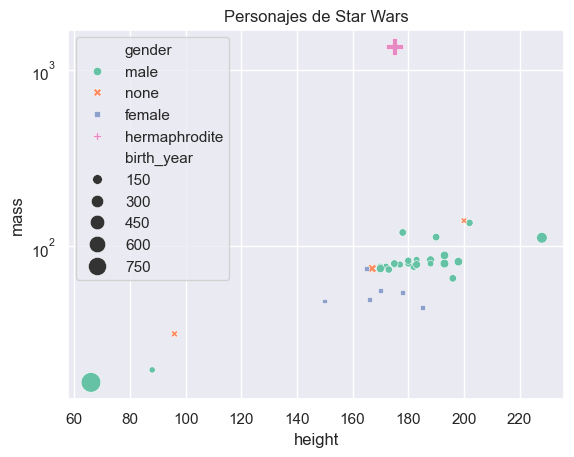

In [2]:
ax = sns.scatterplot(x='height', y='mass'
            , hue='gender', size='birth_year' 
            , style='gender', palette='Set2'
            , sizes=(20, 200)
            , data=people_df)

ax.set_yscale('log')

plt.title('Personajes de Star Wars')


## Ejercicio 1.2.

Sobre el gráfico del ejercicio 1.1:

- Pon título al gráfico y a los ejes x e y. 
- Modifica los límites del eje y para que aparezcan sólo personajes de menos de 150 Kg de peso.
- Sitúa en el gráfico los nombres de 'Darth Vader' y 'Anakin Skywalker'. ¿Cómo es posible tengan un peso y altura tan distintos si eran la misma persona?

Text(0, 15, 'Anakin Skywalker')

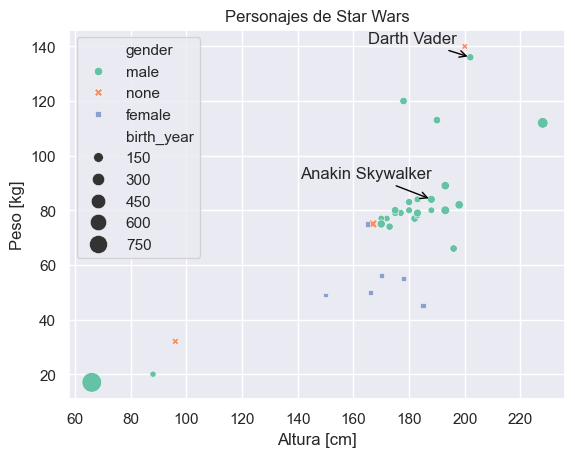

In [3]:
ax = sns.scatterplot(x='height', y='mass'
            , hue='gender', size='birth_year' 
            , style='gender', palette='Set2'
            , sizes=(20, 200)
            , data=people_df[people_df["mass"] < 150])

plt.title('Personajes de Star Wars')
plt.xlabel('Altura [cm]')
plt.ylabel('Peso [kg]')


plt.annotate('Darth Vader',(people_df.loc[people_df.index == 'Darth Vader', 'height'], people_df.loc[people_df.index == 'Darth Vader', 'mass'])
            , textcoords='offset points' # desplaza el punto
            , xytext=(-10,10)  # distancia desplazamiento
            , arrowprops=dict(arrowstyle='->', color='black')
            , ha='right')   # centrado
            
plt.annotate('Anakin Skywalker',(people_df.loc[people_df.index == 'Anakin Skywalker', 'height'], people_df.loc[people_df.index == 'Anakin Skywalker', 'mass'])
            , textcoords='offset points' # desplaza el punto
            , xytext=(0,15)  # distancia desplazamiento
            , arrowprops=dict(arrowstyle='->', color='black')
            , ha='right')   # centrado



### Respuesta
Posiblemente se deba al hecho de que, hacia el final del Episodio III, Anakin en su pelea con Obi-Wan cae en un rio de lava quedando su cuerpo parcialmente destruido. Luego, más adelante en la historia, se muestra el 'nacimiento' de Darth Vader, en el cual se utilizan protesis metálicas tanto en sus piernas como brazos. Pudiendo ser esta la causa principal de su aumento de masa y altura.

## Ejercicio 1.3.

Utiliza las *list comprehension* para calcular el cuadrado de los valores positivos de la siguiente lista:

Muestra el resultado por pantalla.

In [4]:
val = [5, 6, -1, 2, -3, -7, 9, 1]

In [159]:
res = [x*x for x in val if x > 0]

res

[25, 36, 4, 81, 1]

## Ejercicio 1.4.

Construye un diccionario donde se identifique, mediante claves y valores, las siguientes características del personaje Yoda: 'nombre', 'altura', 'peso', 'edad' y 'genero'. Utiliza los datos de people_df.

Muestra el diccionario por pantalla.

In [160]:
# print(people_df[people_df.index == 'Yoda'].to_dict(orient='index'))

nombre = people_df.index[people_df.index == 'Yoda'].values[0]
altura = people_df.loc[people_df.index == 'Yoda', 'height'].values[0]
peso = people_df.loc[people_df.index == 'Yoda', 'mass'].values[0]
genero = people_df.loc[people_df.index == 'Yoda', 'gender'].values[0]

res = {'nombre': nombre, 'altura': altura, 'peso': peso, 'genero': genero}
res

{'nombre': 'Yoda', 'altura': 66.0, 'peso': 17.0, 'genero': 'male'}

## Ejercicio 1.5.

Calcula, a partir de los vectores numpy de altura y peso, vectores numpy que debe definir, el [índice de masa corporal (IMC)](https://es.wikipedia.org/wiki/%C3%8Dndice_de_masa_corporal) de los personajes de star wars contenidos en people_df: 

$IMC = \frac{peso}{altura^{2}}$ donde altura está en metros y el peso en kg.

Muestra los datos por pantalla.

In [161]:
people_height = people_df['height']/100
people_mass = people_df['mass']

people_imc = people_mass/(people_height**2)

people_imc_df = pd.DataFrame({'imc': people_imc})
people_imc_df

,imc
name,
Luke Skywalker,26.027582
C-3PO,26.892323
R2-D2,34.722222
Darth Vader,33.330066
Leia Organa,21.777778
Owen Lars,37.874006
Beru Whitesun lars,27.548209
Biggs Darklighter,25.082863
Obi-Wan Kenobi,23.245985


## Ejercicio 1.6.

A partir del IMC que has calculado en el ejercicio 1.5. Construye un panel con dos histogramas:

- Un histograma con toda la muestra
- Un histograma seleccionando los valores con un IMC inferior a 100.

Text(0.5, 1.0, 'Frecuencia IMC < 100')

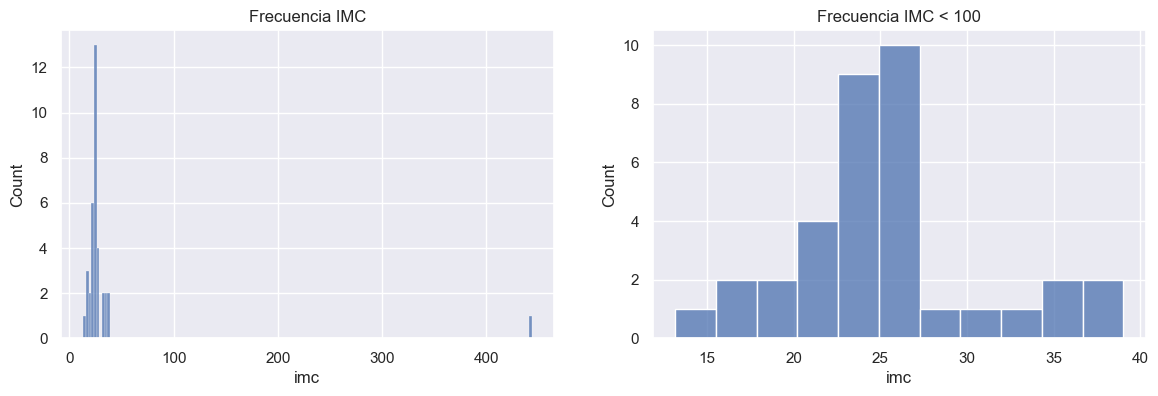

In [162]:
sns.set(rc={'figure.figsize':(14,4)})
fig, axs = plt.subplots(ncols=2)

sns.histplot(data=people_imc_df, x='imc', ax=axs[0]).set_title('Frecuencia IMC')
sns.histplot(data=people_imc_df[people_imc_df["imc"] < 100], x='imc', ax=axs[1]).set_title('Frecuencia IMC < 100')

## Ejercicio 1.7.

A partir del vector 1 y 2 que se definen a continuación contesta las siguientes preguntas:

- Calcula el shape, ndim, size del vector1 y vector2
- Explica cual es la diferencia entre vector1 y vector2 a partir de los que hayas observado

In [163]:
# Aquí se presenta una situación particular: las variables 'altura' y 'peso' son seteados por mí en un ejercicio previo. 
# No habiendo sido instanciadas antes en la notebook propuesta.
# Entiendo que lo que el ejercicio intenta mostrar es el uso de las funciones 'hstack' y 'vstack' indistintamente de los array utilizados. 
# Voy a asumir que hacen referencia a los array numpy nombrados en el ejercicio 1.5

# vector1 = np.hstack([altura,peso])
# vector2 = np.vstack([altura,peso])

vector1 = np.hstack([people_height,people_mass])
vector2 = np.vstack([people_height,people_mass])

In [164]:
# Solución:
print(vector1.shape)
print(vector2.shape)

print(vector1.size)
print(vector2.size)

(72,)
(2, 36)
72
72


### Respuesta
La función `hstack` concatena los numpy arrays **horizontalmente**. Si lo pensamos como una tabla podemos decir que estamos agregando colunas a nuestro dataset. Mientras que la funcion `vstack` apila nuestros arrays n-dimensionales de manera **vertical**. De nuevo nuestra analogía con una tabla, estaríamos agregando filas a nuestro dataset. Este análisis intenta explicar las diferencias en el `shape` de cada vector.

Además podemos notar que `size`, el cual indica la cantidad total de elementos en el array, es idéntico para ambos vectores resultado.

## Ejercicio 1.8.

Crea una copia de people_df llamada personajes_df y renombra las columnas con su traducción al castellano. 

Muestra los 5 primeros registros del nuevo data frame con `.head()`.

In [165]:
personajes_df = people_df.copy()
personajes_df.rename(columns={'height': 'altura', 'mass': 'peso', 'birth_year': 'edad', 'gender': 'genero', 'homeworld': 'planeta'}, inplace = True)
personajes_df.head()

,altura,peso,edad,genero,planeta
name,,,,,
Luke Skywalker,172.0,77.0,19.0,male,https://swapi.dev/api/planets/1/
C-3PO,167.0,75.0,112.0,none,https://swapi.dev/api/planets/1/
R2-D2,96.0,32.0,33.0,none,https://swapi.dev/api/planets/8/
Darth Vader,202.0,136.0,41.9,male,https://swapi.dev/api/planets/1/
Leia Organa,150.0,49.0,19.0,female,https://swapi.dev/api/planets/2/


## Ejercicio 1.9.

Haz el mismo cálculo de IMC que has hecho en 1.5. pero directamente sobre el objeto personajes_df.

Ordena el data frame de mayor a menor IMC y muestra el nombre e IMC de los personajes con IMC por encima de 30.

> ¿Sabias que IMC por encima de 30 se considera obeso?


In [166]:
personajes_df['imc'] = personajes_df['peso']/((personajes_df['altura']/100)**2)

personajes_imc30_df = personajes_df[personajes_df['imc'] > 30].sort_values(by='imc', ascending=False)
personajes_imc30_df['imc']

name
Jabba Desilijic Tiure    443.428571
Yoda                      39.026630
Owen Lars                 37.874006
IG-88                     35.000000
R2-D2                     34.722222
Darth Vader               33.330066
Bossk                     31.301939
Name: imc, dtype: float64

## Ejercicio 1.10.

Inserta un valor faltante en los valores de IMC que sean superiores a 100 y dibuja el histograma del IMC transformado con `.plot.hist()`.

<Axes: ylabel='Frequency'>

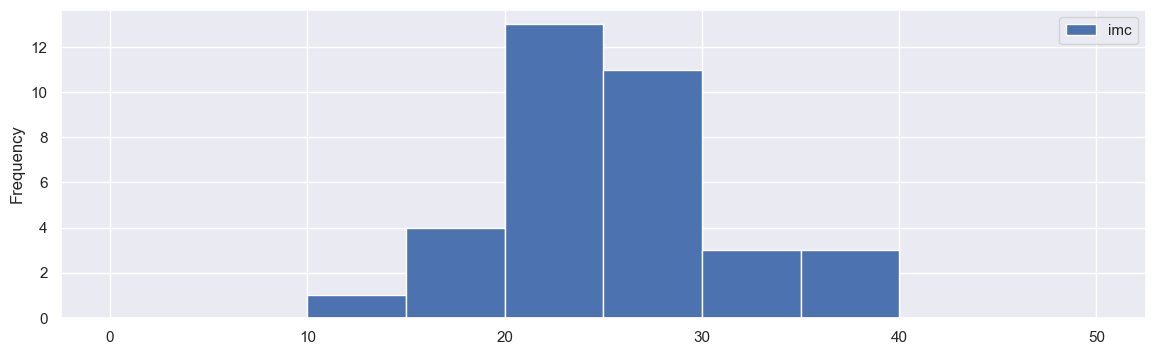

In [167]:
personajes_df.loc[personajes_df['imc'] > 100, 'imc'] = np.nan

personajes_df.plot.hist(column='imc', range=(0, 50)) # no existen valores en el intervalo [50,100], recorto eje de abcisas para mejor visualización
